# Ford Go Bike **2020** Dataset Wrangling and visualisation 
> Authored by: **Abhishek Pandey** [LinkedIn](https://www.linkedin.com/in/abhishekpandeyit/) | [Twitter](https://twitter.com/PandeyJii_)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
>
> [**Bay Wheels**](https://en.wikipedia.org/wiki/Bay_Wheels#:~:text=Bay%20Wheels%20is%20a%20regional,Area%20Air%20Quality%20Management%20District.) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In [1]:
"""
Importing all the required python libraries for wrangling process
"""
import numpy as np #For numerical 
import pandas as pd
import matplotlib.pyplot as plt #For plotting graphs
import seaborn as sns
import os
import glob
%matplotlib inline

## Data Gathering

In [2]:
"""Appending all datasets together to intiate the process of wrangling"""

folder_name = 'Datasets'
path_to_save = "F:/Github_repo/BayWheelsRideDataExploration/final_dataset_2020.csv"

def append():
    frames = [pd.read_csv(D) for D in glob.glob(os.path.join(folder_name, '*.csv'))]
    data_concat = pd.concat(frames, ignore_index=True) #Concatenating all the csv files using pandas concat function.
    data_concat.to_csv(path_to_save, index=False) #Saving the concatenated dataset to a single file for further exploraton.
    data_concat.shape

append()    

In [3]:
df = pd.read_csv('F:/Github_repo/BayWheelsRideDataExploration/final_dataset_2020.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,83118.0,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68239.0,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55407.0,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54929.0,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55700.0,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
'''Defining function to do some common exploration'''
dataframe = df
def explore(mode):
    if mode == "size":
        print(f"Rows ={dataframe.shape[0]} and Columns={dataframe.shape[1]} ")
    if mode == "info":
        print("Column-Datatype Information\n")
        dataframe.info()
    if mode == "desc":
        print("Common Description\n")
        dataframe.describe()
    if mode == "null":
        print("Columns with Null/NAN Value\n")
        return dataframe.isnull().sum()
    if mode== "dup":
        print(f"No of Duplicate values = {dataframe.duplicated().sum()}")
    

In [6]:
explore("size")

Rows =1127517 and Columns=24 


In [7]:
explore('info')

Column-Datatype Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127517 entries, 0 to 1127516
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  float64
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         559454 non-null  float64
 4   start_station_name       560687 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           555862 non-null  float64
 8   end_station_name         557136 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  float64
 12  user_type                905007 non-null  object 
 13  rental_access_method     617

In [8]:
explore("null")

Columns with Null/NAN Value



duration_sec               222510
start_time                 222510
end_time                   222510
start_station_id           568063
start_station_name         566830
start_station_latitude     222510
start_station_longitude    222510
end_station_id             571655
end_station_name           570381
end_station_latitude       222510
end_station_longitude      222510
bike_id                    222510
user_type                  222510
rental_access_method       509659
ride_id                    905007
rideable_type              905007
started_at                 905007
ended_at                   905007
start_lat                  905007
start_lng                  905007
end_lat                    905373
end_lng                    905373
member_casual              905007
is_equity                  989266
dtype: int64

In [9]:
explore("dup")

No of Duplicate values = 7512


### Finding Value counts of the possible columns in our Data Set

In [10]:
columns=["user_type", "rental_access_method"]
for col in columns:
    print(f"Value counts for {col}")
    print(df[col].value_counts())
    print("\n\n")

Value counts for user_type
Subscriber    544696
Customer      360311
Name: user_type, dtype: int64



Value counts for rental_access_method
app        570471
clipper     47387
Name: rental_access_method, dtype: int64





**Finally our process of Data Gathering completes here and I reach on the following conclusions after exploring our dataset at the initial stage:**
> - The size of this dataset is Rows =1127517 and Columns=24
> - This dataset have some duplicate value but there are many null values present in this dataset.
> - The attributes or columns in this Dataset have incorrect datatypes.

To solve these issue I'll further explore this dataset in the Data Cleaning Process Next to this part.

## Data Cleaning
> Cleaning this dataset might affect our original dataset, so to prevent the dataloss I am creating another copy of our dataframe and will work further on it.

In [11]:
#Creating a copy of our dataframe
df_new=df

In [12]:
#dropping duplicate value
df_new.drop_duplicates(inplace=True)
#Confirming changes
explore('dup')

No of Duplicate values = 0


In [13]:
explore('size')

Rows =1120005 and Columns=24 


### Correcting some common issues such as incorrect data types, wrong formatting and other issue which can affect our data visualisation process.

In [14]:
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

df_new['start_station_id'] = df_new['start_station_id'].astype('str')
df_new['end_station_id'] = df_new['end_station_id'].astype('str')
df_new['bike_id'] = df_new['bike_id'].astype('str')

df_new['user_type'] = df_new['user_type'].astype('category')

'''
Here I found that another issue, so to solve that issue adding new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month.

'''
df_new['duration_minute'] = df_new['duration_sec']/60

df_new['start_date'] = df_new.start_time.dt.strftime('%Y-%m-%d')
df_new['start_hour_of_day'] = df_new.start_time.dt.strftime('%H')
df_new['start_day_of_week'] = df_new.start_time.dt.strftime('%A')
df_new['start_month'] = df_new.start_time.dt.strftime('%B')

In [15]:
'''
Saving this cleaned datset for further exploration in slide_deck notebook.
'''



df_new.to_csv("F:/Github_repo/BayWheelsRideDataExploration/cleaned_dataset_2020.csv", index=False)

## Dataset Visualisation

### Univariate Exploration

> **Points to explore:**
>> - Which user type mostly opt for bike trip.
>> - Which Payment method mostly used by users.
>> - Trip distribution over weekdays
>> - Trip distribution over days Hour

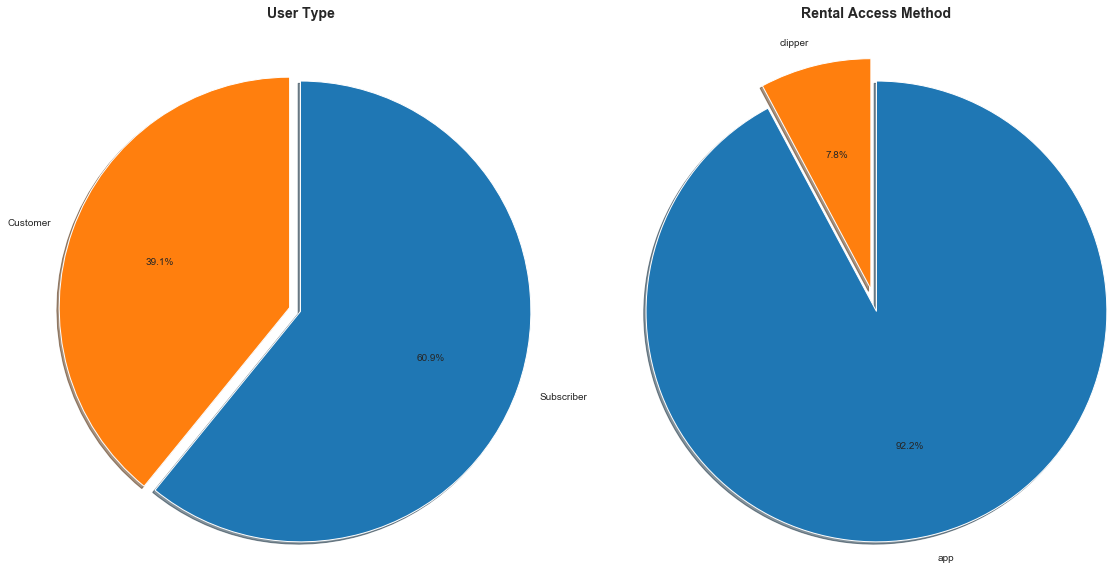

In [44]:
sorted_vals = df_new.user_type.value_counts();
method = df_new.rental_access_method.value_counts();
plt.rcParams['figure.figsize'] = 16, 8
fig=plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1);
ax1.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True, radius=2);
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1);
ax2.pie(method, explode=[0, 0.2], labels=method.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True, radius=2);
ax1.set_title('User Type',fontsize=14, fontweight='semibold', y=1.5);
ax2.set_title('Rental Access Method', fontsize=14, fontweight='semibold', y=1.5);
plt.show()

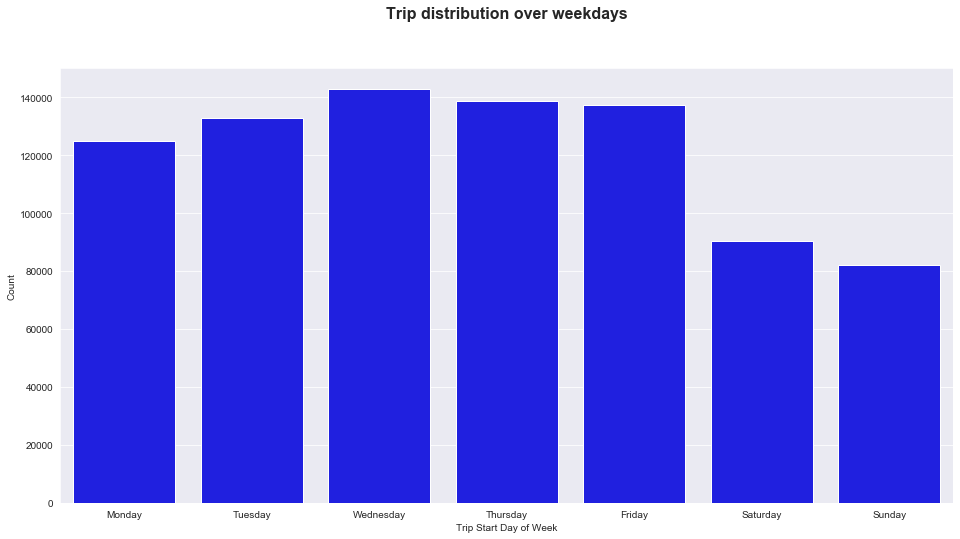

In [43]:
plt.rcParams['figure.figsize'] = 16, 8
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_new['start_day_of_week'] = df_new['start_day_of_week'].astype(weekdaycat)
sns.countplot(data=df_new, x='start_day_of_week', color="blue");
plt.title("Trip distribution over weekdays",fontsize=16, fontweight='semibold',y=1.1)
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

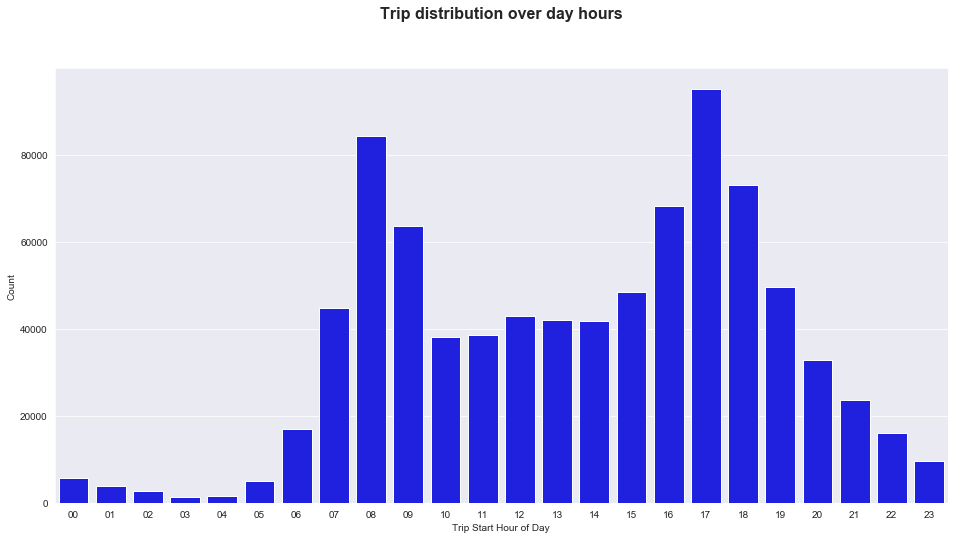

In [45]:
plt.rcParams['figure.figsize'] = 16, 8
base_color = sns.color_palette('colorblind')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_new, x='start_hour_of_day', color='blue');
plt.title("Trip distribution over day hours",fontsize=16, fontweight='semibold',y=1.1)
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

### Result of Univariate Exploration:
> - There are 61% users are Subscriber and 39 % users are Customers, which means no. of subscribers are much higher than that of no. of customers.
> - Examining second visualisation we found that only 8% of peoples are using clippers as their rental method rest 92% of the users are using app for paying the rent of bikes. 
> - Trip duration of weekdays predicts that peoples are taking bike trip mostly on working days i.e. Monday-Friday and on weekends the no. of users decrease to just half of workdays.
> - Trip duration over weekends gives a very important figure that mostly users hire bikes between 07-09 AM in the Morning and 04-06 Pm in evening where 8 Am in morning and 5 PM in evening is the peaktime.

**Conclusion:**
After analysing all the results I reached on the following conclusion:
> - Mostly peoples choose subscription instead of paying everyday so the company should more focus on subscription policy and make it attractive to attract rest 39% of the users.
> - Peoples are highly intrested in using app for payment instead of paying in the form of clippers, offers for new customers may attract rest 8% customers to on the app.
> - Users are hiring bikes mostly on working days, so I can say that they are working professional, by giving coupons or some discount for weekends company may increase the hiring on weekends too.
> - Most important prediction of this Exploration is users are hiring bikes in the rush hours i.e. between 07-09 AM in the Morning and 04-06 Pm in evening where 8 Am in morning and 5 PM in evening is the peaktime. So we may take 2 actions for increasing hiring:
>> -  Increase more bikes in the peak hours for the ease of customers.
>> -  Decrease rent of the bikes in non-rush hours i.e. 10 AM to 15 PM so that users who are flexible with time will shift into these hours and rush will be decrease in the peak hours so we can add more users who have time constraints in the peak hours.

### Bivariate Exploration

> **Points to explore:**
>> - Which user type takes trip for a longer duration.
>> - Looking for a weekly stats of the trip duration for both customer types.
>> - Hourly trip duration of Subscriber and customer user type.

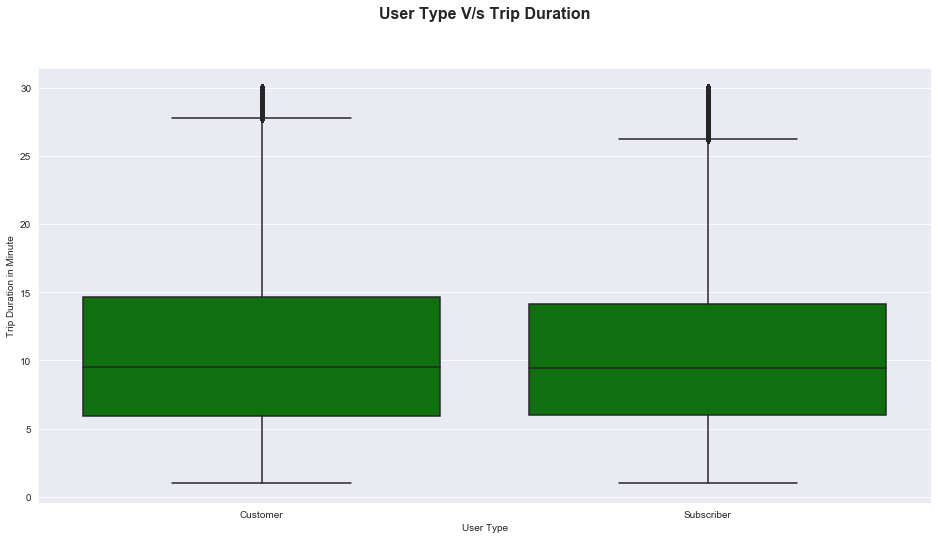

In [46]:
sns.boxplot(data=df_new, x='user_type', y='duration_minute', color= "green");
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title("User Type V/s Trip Duration",fontsize=16, fontweight='semibold',y=1.1);

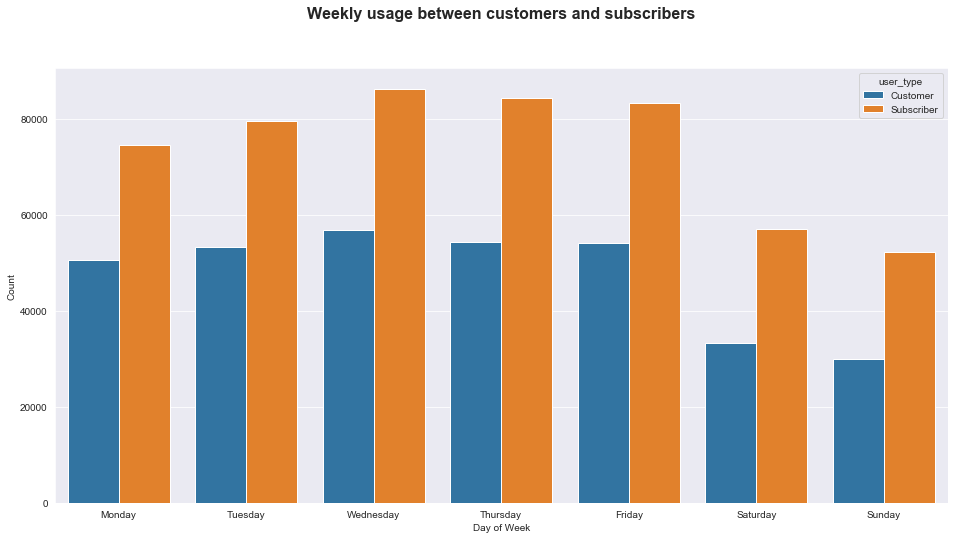

In [47]:
sns.countplot(data=df_new, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title("Weekly usage between customers and subscribers",fontsize=16, fontweight='semibold',y=1.1);

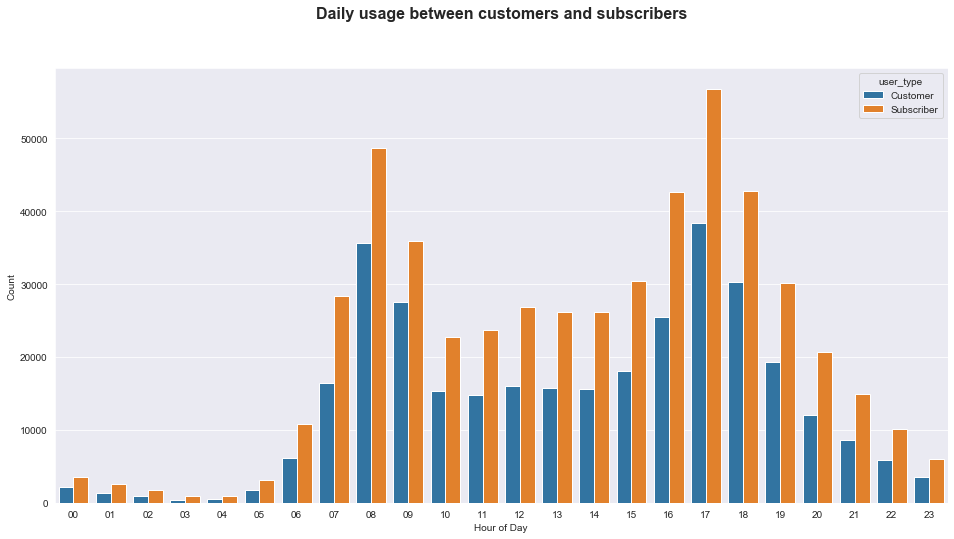

In [48]:
sns.countplot(data=df_new, x='start_hour_of_day', hue='user_type', palette=None);
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('Daily usage between customers and subscribers',fontsize=16, fontweight='semibold',y=1.1);

### Result of Bivariate Exploration:
> - The interquratile range of customers are larger than that of subscribers.
> - Second visualisation shows a similar trends in both user types.
> - Hourly trip distribution in 3rd graph shows nearly same trend in both user types where peak is 08AM in morning and 5 PM in evening of both the user type.

**Conclusion:**
After analysing all the results I reached on the following conclusion:
> - After looking at boxplot I reached on a conclusion that Subscribers take shorter duration of ride in comparision with customers.
> - Subscribers are more sufficient than customers in using the trip, its reason may be Subscribers opt for a short duration of trip or traffic can be a factor affecting the trip duration.
> - While talking about 2nd and 3rd Visualisation we found that both type of user are following same trend of trip distribution thus I can say that both the user are related to a same group i.e. Working professional the only difference between then is their way of paying rent for the trip.

### Multivariate Exploration

> **Points to explore:**
>> - Which user type takes trip for a longer duration.
>> - Looking for a weekly stats of the trip duration for both customer types.
>> - Hourly trip duration of Subscriber and customer user type.

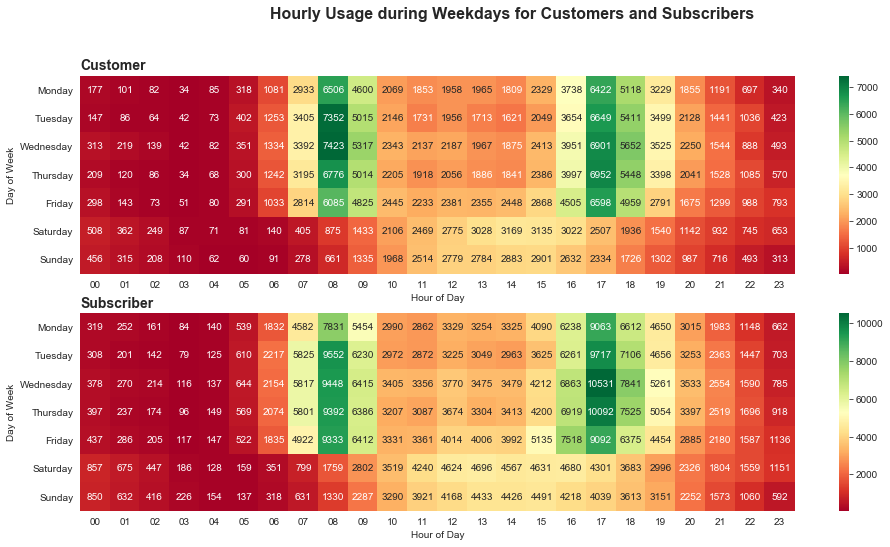

In [49]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers',fontsize=16, fontweight='semibold',y=1);

plt.subplot(2, 1, 1)
customers = df_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sns.heatmap(ct_counts, cmap='RdYlGn',annot=True, fmt="d");
plt.title('Customer', loc='left',fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.subplot(2, 1, 2)
subscribers = df_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sns.heatmap(st_counts, cmap='RdYlGn', annot=True, fmt="d");
plt.title('Subscriber', loc='left',fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

### Result of Multivariate Exploration:
> - The number of subscriber is quite higher than the number of customers and they both are showing same trend.

**Conclusion:**
After analysing all the results I reached on the following conclusion:
> - As already I analysed all the different factors of the dataset, this heatmap also gave the same result which explain the following points:
>> -  The no. of User type - subscriber is quite higher than customer type user.
>> -  Peak time of hiring bike is 08 AM in the morning and 05 PM in the evening.
>> -  Users hire bikes trip mostly on workdays.
>> -  These all data predicts that the user are mostly working professionals.